<h1 style="text-align: center;">Deep Learning<br><br>Classification with ANN<br><br>Cancer Data<br><h1>

***Tensorflow playground:***
https://playground.tensorflow.org/

# Keras Classification

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

/Users/kadiryildirim/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import tensorflow as tf

tf.__version__

2023-05-15 19:46:00.431386: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.11.0'

In [4]:
from sklearn.datasets import load_breast_cancer

In [5]:
cancer = load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(cancer["target_names"])
# binary classification which means we should use sigmoid act function and 1 neuron in the output layer

['malignant' 'benign']


In [8]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [9]:
# get the feature names
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
# create a dataframe without target
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df_feat.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077


In [11]:
# create a df for target
df_target = pd.DataFrame(cancer['target'],columns=['Cancer'])
df_target.head()

,Cancer
0,0
1,0
2,0
3,0
4,0


In [12]:
# concat the features and target dfs.
frames = [df_feat, df_target]
df = pd.concat(frames,axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Cancer
0,17.990,10.380,122.800,1001.000,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,8.589,153.400,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,184.600,2019.000,0.162,0.666,0.712,0.265,0.460,0.119,0
1,20.570,17.770,132.900,1326.000,0.085,0.079,0.087,0.070,0.181,0.057,0.543,0.734,3.398,74.080,0.005,0.013,0.019,0.013,0.014,0.004,24.990,23.410,158.800,1956.000,0.124,0.187,0.242,0.186,0.275,0.089,0
2,19.690,21.250,130.000,1203.000,0.110,0.160,0.197,0.128,0.207,0.060,0.746,0.787,4.585,94.030,0.006,0.040,0.038,0.021,0.022,0.005,23.570,25.530,152.500,1709.000,0.144,0.424,0.450,0.243,0.361,0.088,0
3,11.420,20.380,77.580,386.100,0.142,0.284,0.241,0.105,0.260,0.097,0.496,1.156,3.445,27.230,0.009,0.075,0.057,0.019,0.060,0.009,14.910,26.500,98.870,567.700,0.210,0.866,0.687,0.258,0.664,0.173,0
4,20.290,14.340,135.100,1297.000,0.100,0.133,0.198,0.104,0.181,0.059,0.757,0.781,5.438,94.440,0.011,0.025,0.057,0.019,0.018,0.005,22.540,16.670,152.200,1575.000,0.137,0.205,0.400,0.163,0.236,0.077,0


## Exploratory Data Analysis and Visualization

In [13]:
df.shape

(569, 31)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [15]:
df.describe().T
# compare mean and std for outlier check

,count,mean,std,min,25%,50%,75%,max
mean radius,569.000,14.127,3.524,6.981,11.700,13.370,15.780,28.110
mean texture,569.000,19.290,4.301,9.710,16.170,18.840,21.800,39.280
mean perimeter,569.000,91.969,24.299,43.790,75.170,86.240,104.100,188.500
mean area,569.000,654.889,351.914,143.500,420.300,551.100,782.700,2501.000
mean smoothness,569.000,0.096,0.014,0.053,0.086,0.096,0.105,0.163
mean compactness,569.000,0.104,0.053,0.019,0.065,0.093,0.130,0.345
mean concavity,569.000,0.089,0.080,0.000,0.030,0.062,0.131,0.427
mean concave points,569.000,0.049,0.039,0.000,0.020,0.034,0.074,0.201
mean symmetry,569.000,0.181,0.027,0.106,0.162,0.179,0.196,0.304
mean fractal dimension,569.000,0.063,0.007,0.050,0.058,0.062,0.066,0.097


Cancer
1    357
0    212
Name: count, dtype: int64

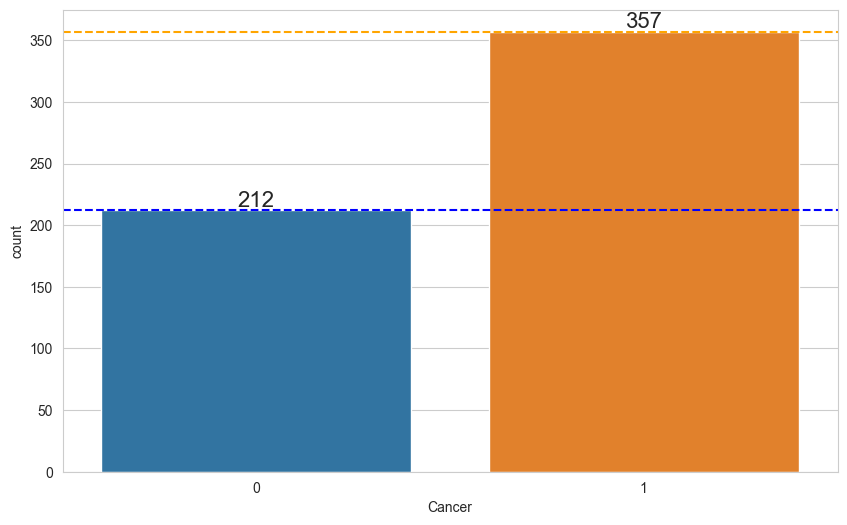

In [16]:
# check class distribution
display(df.Cancer.value_counts())
ax = sns.countplot(x=df["Cancer"])
ax.bar_label(ax.containers[0], size=16)
plt.axhline(y=df.Cancer.value_counts()[1], color='orange', linestyle='--')
plt.axhline(y=df.Cancer.value_counts()[0], color='blue', linestyle='--');
# imbalanced bir data ama imbalanced tekniklerinin uygulanıp uygulanmamasına dair gerekliliği
# test ve train acc vs skorlari gorunce karar verecegiz, ama bir imbalanced dataa

# hatirlatma: imbalanced datada uyguladigimiz teknikler:
# 1. class_weight = balanced
# 2. smote: oversampling undersampling
# 3. threshold ile oynamak

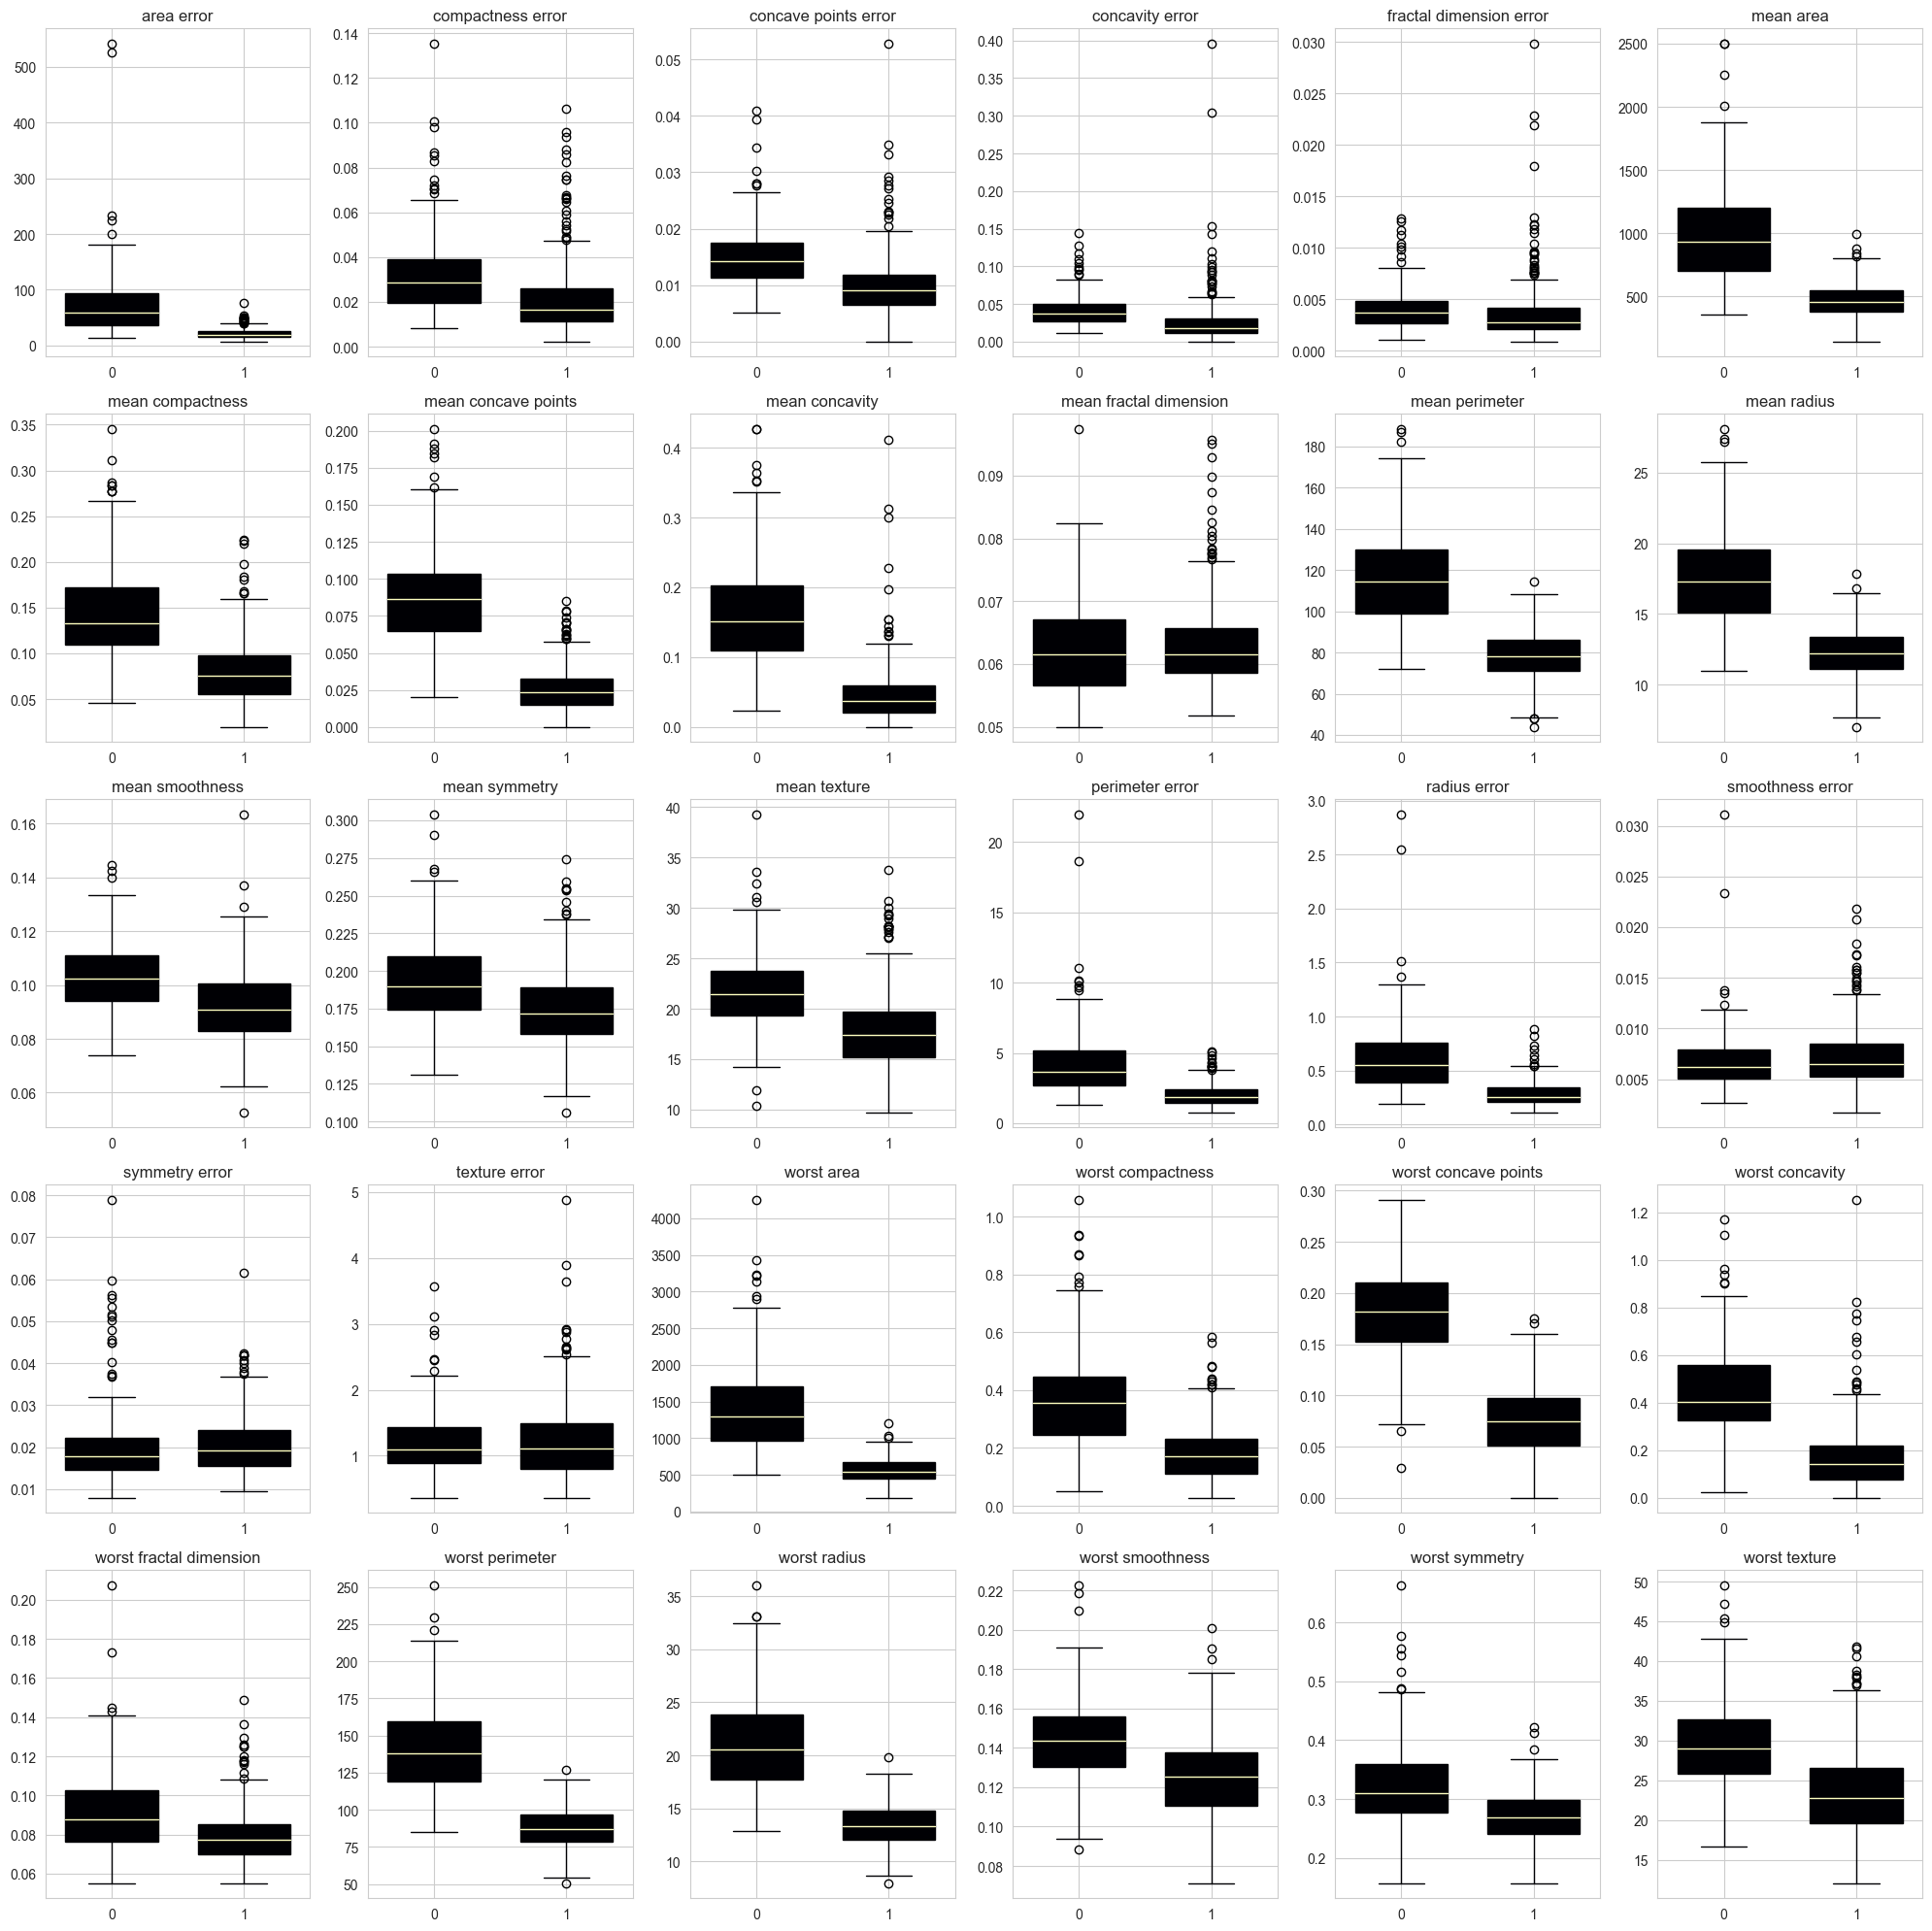

In [17]:
# check the outliers in terms of the classes of target
df.plot(kind="box",
        by="Cancer", 
        layout=(5, 6), 
        subplots=True, 
        widths=0.7, 
        figsize=(20,20), 
        cmap="magma", 
        patch_artist=True)
plt.tight_layout();

# classification problemlerinde outlier tespiti yaparken class bazında bakmazsak hata yapabiliriz.


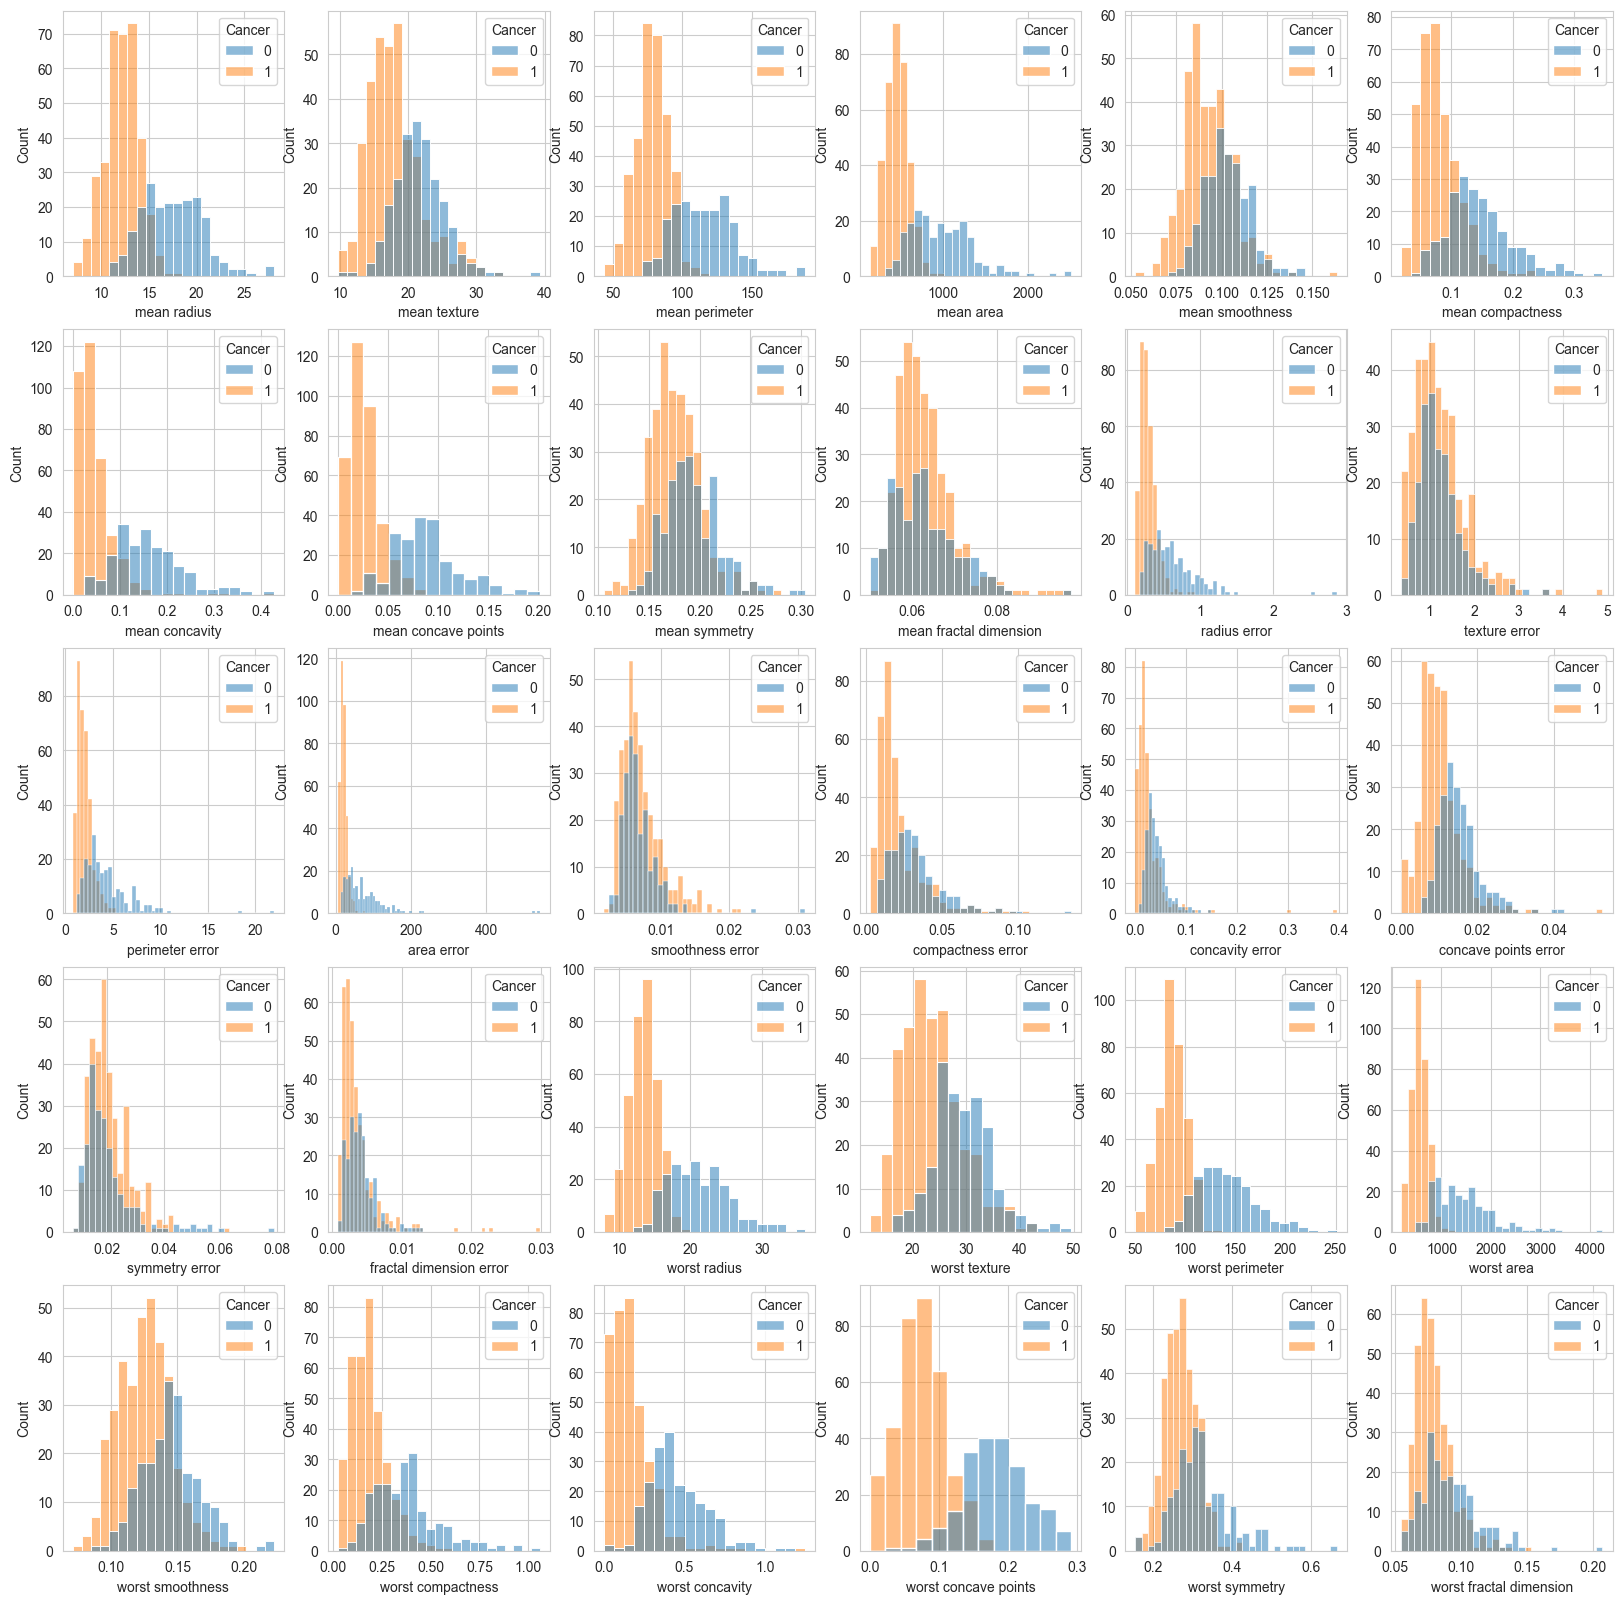

In [18]:
# which features separate the classes better
plt.figure(figsize=(20, 20))
for idx, col in enumerate(df.select_dtypes(include='number').columns[:-1]):
    plt.subplot(5, 6, idx+1)
    sns.histplot(data=df, x=col, hue='Cancer')

In [19]:
pd.__version__  # numeric_only=True 


'2.0.1'

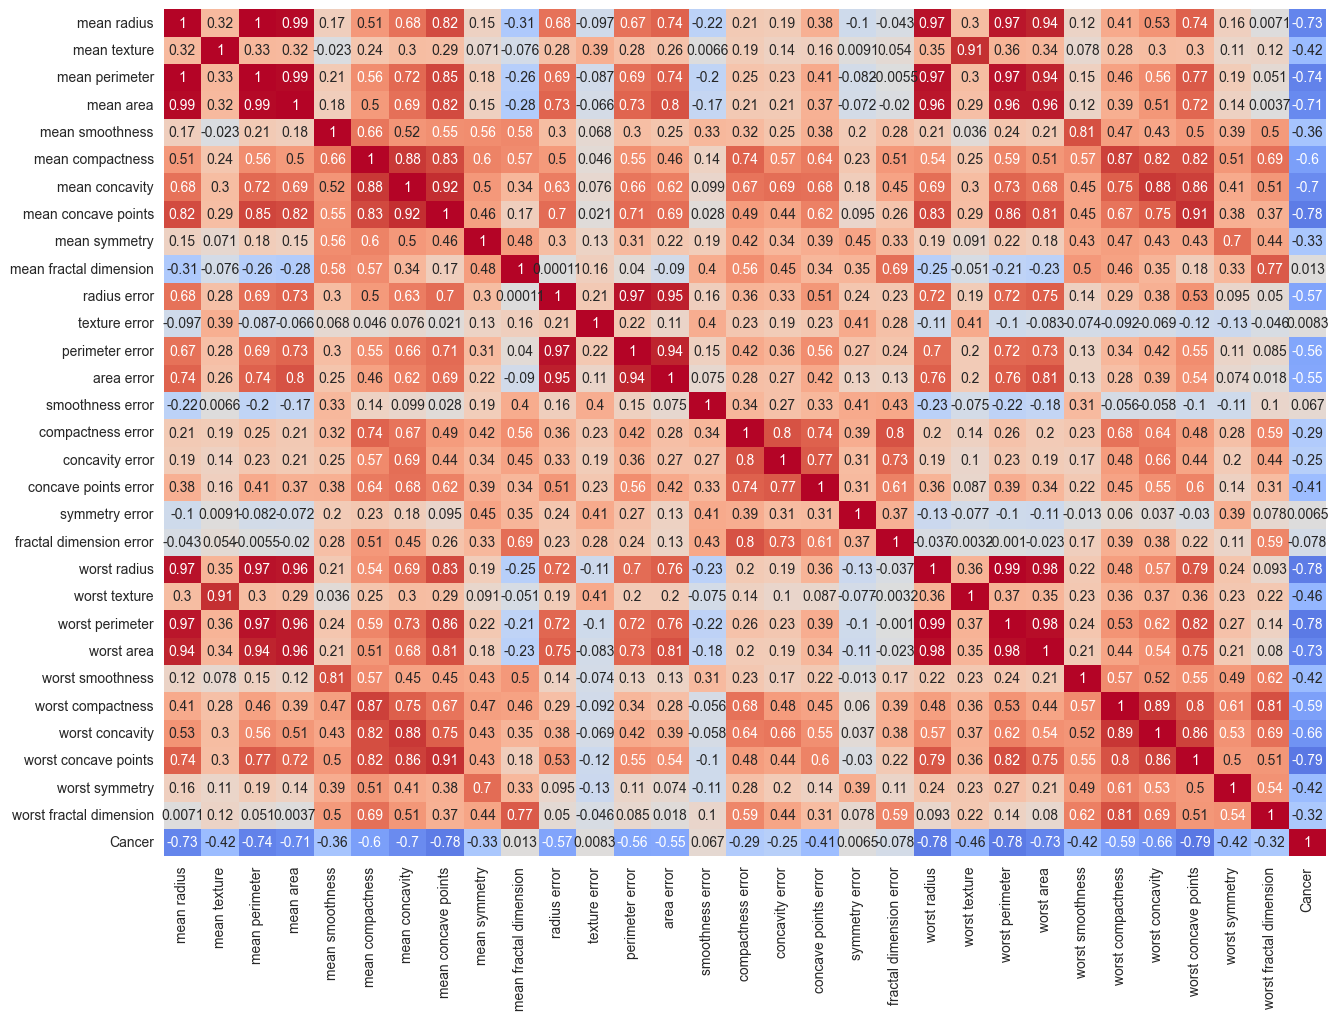

In [20]:
plt.figure(figsize=(15, 11))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm", cbar=False)
plt.show()

In [20]:
drop_list = ["worst perimeter", "worst area", "perimeter error", "area error", "mean perimeter", "mean area"]
# yüksek korelasyonlu featureları düşürüyorum modelimin hızlı çalışması için ama domain knowledge'ı olan birine ulaşabiliyorsam
# ona danışarak bu işlemi yapmalıyız.

# drop edilmils ve edilmemis haliyle baktigimiz skorlarda drop eidlmis hali daha iyi.

In [21]:
df.shape

(569, 31)

In [22]:
df1 = df.drop(drop_list, axis=1).copy()

In [23]:
df1.shape

(569, 25)

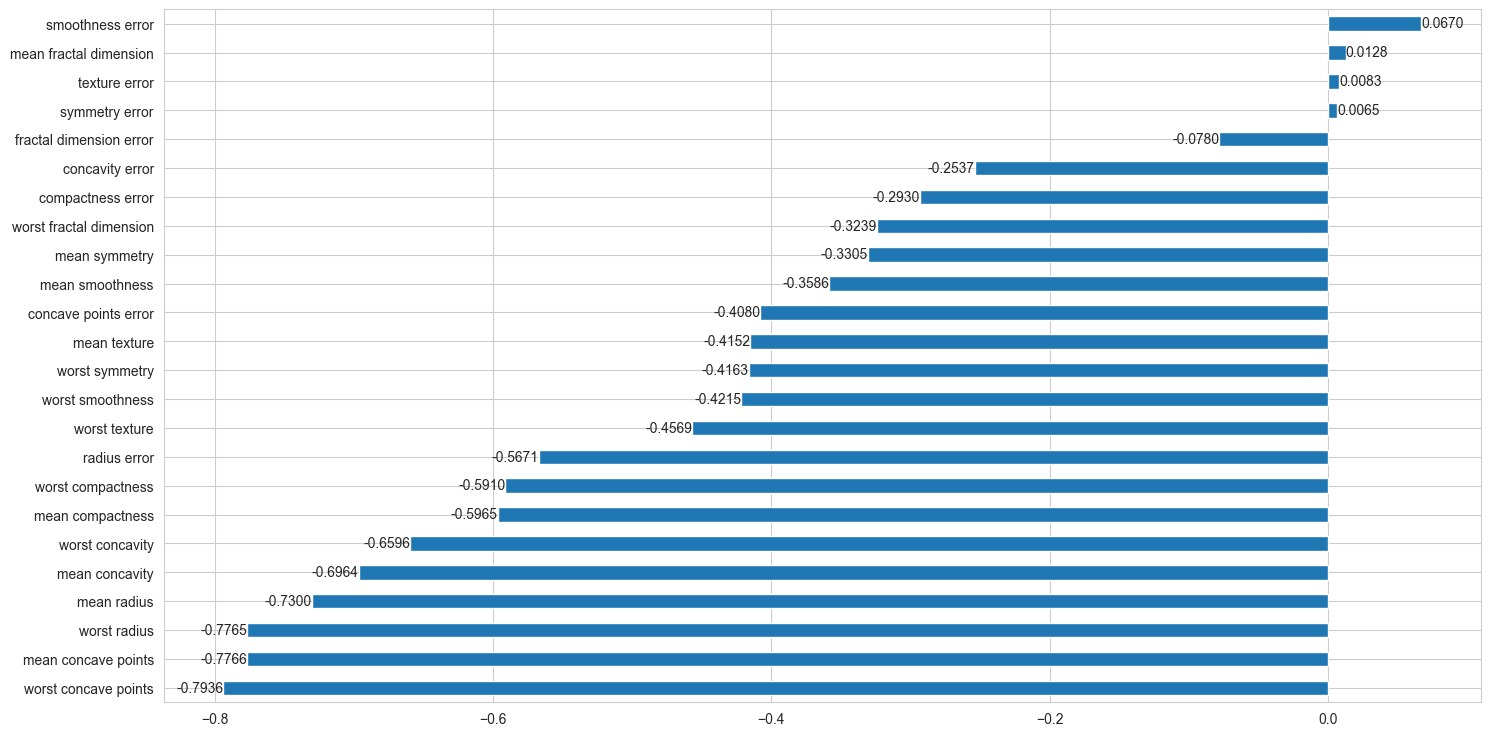

In [24]:
plt.figure(figsize=(17, 9))
ax = df1.corr()["Cancer"].sort_values().drop("Cancer").plot(kind="barh")
ax.bar_label(ax.containers[0], fmt="%.4f")
plt.show()

## Preprocessing of Data
- Train | Test Split, Scalling

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,RobustScaler

In [26]:
X = df1.drop('Cancer', axis=1)
y = df1['Cancer']

In [27]:
seed = 13

In [28]:
## classification problemlerinde özellikle imbalanced datalarda validation_split kullanmak bizim kötü skorlar almamıza neden
# olabilir . Bundan dolayı validation_data belirlememiz gerekiyor.

In [29]:
X_train1, X_test, y_train1, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve test datasını ayırdık.
# val datayi ybu ustte olusturdugumuz train datasi icinden olusturacagiz
X_train, X_val, y_train, y_val = train_test_split(
    X_train1, y_train1, stratify=y_train1, test_size=0.1, random_state=seed 
)

# classların dağılımının oranını göz önünde bulundurarak bu train datasını ve validation datasını ayırdık.

In [30]:
# scaler = MinMaxScaler()
scaler = RobustScaler()
# ann arka planda gradient descent çalıştırdığı için scaler'a ihtiyaç duyar.
## bütün scaling çeşitlerini deneyebiliriz RobustScaler() daha iyi skorlar verdiğinden onunla devam ediyorum.


In [31]:
X_train = scaler.fit_transform(X_train) # fit&transform train data
X_val = scaler.transform(X_val) # transform val data
X_test = scaler.transform(X_test) # transform test data

# pre-processingin bir diger adimi encoding ama categorical feature yok elimizde


## Modelling & Model Performance

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score


In [33]:
X_train.shape

(460, 24)

In [34]:
X_val.shape

(52, 24)

In [35]:
X_test.shape

(57, 24)

In [36]:
tf.keras.utils.set_random_seed(seed)

# biz normalde modelin mimarisini her kurduğumuzda random olarak ağırlıkları ve bias'leri atıyor ama biz şimdi 
# bazı kavramlar göreceğiz onların farklarını görebilmek için 
# tf.keras.utils.set_random_seed(seed)  ile model her çalıştığında aynı ağırlıkları atasın istiyorum.
# sadece egitim amacli, normalade projelerde veya gercek hayatta kullanmayacagiz

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
#model.add(Activation("relu")) # Activation function can be added separately as a different line after each layer. 
# We have to import also Activation from the keras.layers as we did above
model.add(Dense(1, activation = "sigmoid"))

# targetımız binary bir yapıda olduğundan  output layerda 1  nöron olacak şekilde mimamirizi oluşturuyoruz.
# activation = "sigmoid" yazdığımıza dikkat edelim hiçbir şey yazmazsak defatulu linear'di hatırlarsak.

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# asagida skorlardan datanin imbalanced da olsa classlari ogrendigini gorduk bu nedenle accuracy ile devam edebiliriz

# problemimiz classification problemi olduğundan loss = "binary_crossentropy" yapıyoruz .
# optimizer hyperparametresi ağırlıkları güncellerken ; 
# hangi gradient descent türünü kullanmak istediğimizle alakalıdır 'rmsprop' gibi "adam" gibi optimizer çeşitlerini deneyerek
# en iyi sonucu hangisi veriyorsa yola onunla devam etmemiz gerekir burada optimizer türü datadan dataya göre farklılık gösterir
#metrics=["accuracy"] ile, modelin accuracy'sinin de takip edilebileceğini belirtiyoruz.
# Bu, eğitim sırasında modelin accuracy'sini de izlememize olanak sağlar.

2023-05-15 19:47:14.569535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
# biz bütün classları %100 başarıyla tahmin edersek loss = binary_crossentropy sıfır çıkar teoride.

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                900       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,747
Trainable params: 1,747
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(24, 36) dtype=float32, numpy=
 array([[ 4.54888642e-02, -1.13989741e-01,  3.13162595e-01,
         -1.47306368e-01, -5.35403192e-02, -2.11291865e-01,
         -2.85253823e-02, -4.61988449e-02, -3.29036117e-02,
          9.88882780e-02, -2.01522082e-01, -5.85558712e-02,
         -1.71605140e-01,  1.89421505e-01,  1.19545043e-01,
          3.06690037e-02, -6.54053092e-02,  2.04231411e-01,
          1.47658855e-01, -2.92651951e-01, -1.97620034e-01,
          1.14863724e-01, -1.54108092e-01, -2.27878138e-01,
         -2.19076276e-01,  1.13795757e-01,  3.98090482e-03,
         -1.98024377e-01,  2.51402527e-01,  2.58467585e-01,
          1.84452146e-01, -2.21124589e-01,  3.21215689e-02,
          1.86698824e-01, -3.10356796e-01,  1.02656722e-01],
        [ 8.06191862e-02, -5.95543981e-02, -2.22243905e-01,
         -2.38366127e-01, -1.81984305e-02,  2.59152025e-01,
         -2.43178934e-01, -1.30512387e-01, -1.32678241e-01,
          1.69477135e-01,  2.97

In [40]:
model.fit(x=X_train, 
          y=y_train, 
          validation_data=(X_val, y_val), # x_val, y_val that we assigned before as validation_data
          batch_size=32, 
          epochs=600,
          verbose=1)


#  validation_data=(X_val, y_val) yukarıda ayırdığımız validation datasını kullanıyoruz.

Epoch 1/600
15/15 [==============================] - 1s 14ms/step - loss: 0.6530 - accuracy: 0.6543 - val_loss: 0.6092 - val_accuracy: 0.7885
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.8370 - val_loss: 0.5229 - val_accuracy: 0.8846
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.9000 - val_loss: 0.4452 - val_accuracy: 0.9038
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3079 - accuracy: 0.9196 - val_loss: 0.3844 - val_accuracy: 0.9038
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.2304 - accuracy: 0.9304 - val_loss: 0.3405 - val_accuracy: 0.9423
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.1724 - accuracy: 0.9500 - val_loss: 0.3276 - val_accuracy: 0.9423
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.1351 - accuracy: 0.9609 - val_loss: 0.3092 - val_accuracy: 0.9615
Epoch 8/600


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.653,0.654,0.609,0.788
1,0.535,0.837,0.523,0.885
2,0.409,0.900,0.445,0.904
3,0.308,0.920,0.384,0.904
4,0.230,0.930,0.341,0.942


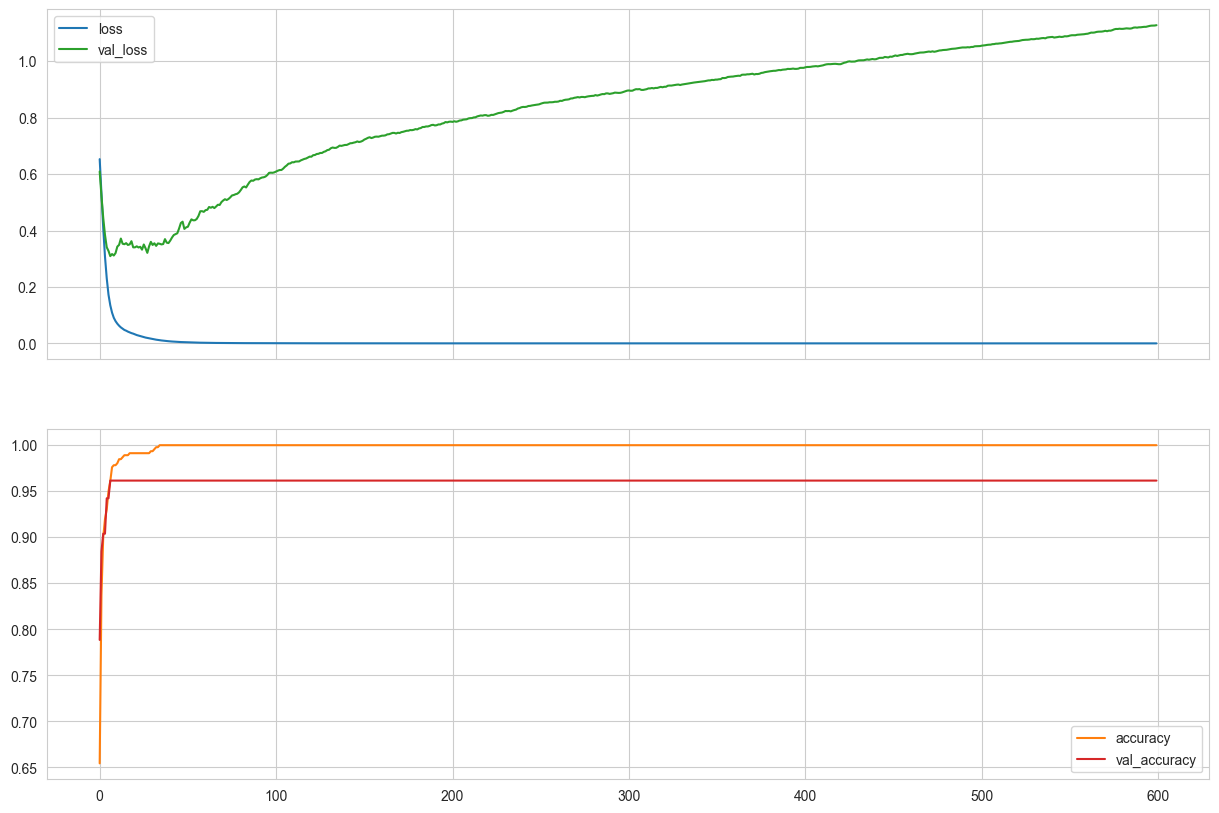

In [42]:
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()


In [43]:
# modelimizin overfittinge gittiği çok ragat bir şekilde gözüküyor loss val_loss'u karşılaştırdığımızda.

In [44]:
model.evaluate(X_test, y_test, verbose=0)

[0.8896286487579346, 0.9298245906829834]

In [45]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.8896286487579346
accuracy :  0.9298245906829834


In [46]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


# burada predict doğrudan çalışmıyor bize olasılıklar döndürdüğü için 0.5'den yukarıda olanları 1 classına ataması için
# model.predict(X_test) > 0.5 şeklinde kullanıyoruz .

2/2 [==============================] - 0s 3ms/step
[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [47]:
## modelimizin test datasında skorları yüksek ama grafikte de gördük modelimiz overfittinge gitmiş bizim bu modeli overfitinden 
## kurtarmamız gerekecek.Çünkü genelleme yapamıyor şu anda .

### EarlyStopping

In [48]:
from tensorflow.keras.callbacks import EarlyStopping

In [49]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [50]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)



# "monitor" : Takip edilecek skoru yazıyoruz buraya mesela val_loss kullandık ,val_accuracy'de yazabilirdik
# biz val_loss'un minimum olmasını istediğimiz için mode = "min" yaptık .val_accuracy yazsaydık mode = "max" yapacaktık
# patience ise 25 epoch boyunca eğer val_loss düşmezse eğitimi durdurmasını söylüyoruz patience olarak da best pratice şu 
# olur diyebiliceğimiz bir durum yoktur .ama genelde 10-25 arası bir değer kullanılır.
#m odel eğer 25 epoch boyunca val_loss değerinde bir iyileşme görmezse eğitimi keser.
# restore_best_weights = True ise modelin eğitimi kestiği yerdeki değil de 25 epoch önceki ağırlıklar ile modeli kurmasını
# istediğimizi söylüyoruz default'u False'tur ve öyle bırakırsak eğitimi kestiği yerdeki ağırlıklar ile model eğitilmiş olur .

In [ ]:
# diyelim kimetrşcse recall yazdik, o zaman monitore val_recall der ve mode'a max yazriz. recall
# 1 classının skorlarını getirecegi icin onu max etmek isteriz??

In [51]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)


## yukarıda tanımladığımız early stop değişkenini model.fit içerisinde callbacks hyperparametresine LISTE içerisinde veriyoruz
# ki model early_stop kullanacağını anlasın.

Epoch 1/600
15/15 [==============================] - 1s 13ms/step - loss: 0.6530 - accuracy: 0.6543 - val_loss: 0.6092 - val_accuracy: 0.7885
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5346 - accuracy: 0.8370 - val_loss: 0.5229 - val_accuracy: 0.8846
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4095 - accuracy: 0.9000 - val_loss: 0.4452 - val_accuracy: 0.9038
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3079 - accuracy: 0.9196 - val_loss: 0.3844 - val_accuracy: 0.9038
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.2304 - accuracy: 0.9304 - val_loss: 0.3405 - val_accuracy: 0.9423
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.1724 - accuracy: 0.9500 - val_loss: 0.3276 - val_accuracy: 0.9423
Epoch 7/600
15/15 [==============================] - 0s 3ms/step - loss: 0.1351 - accuracy: 0.9609 - val_loss: 0.3092 - val_accuracy: 0.9615
Epoch 8/600


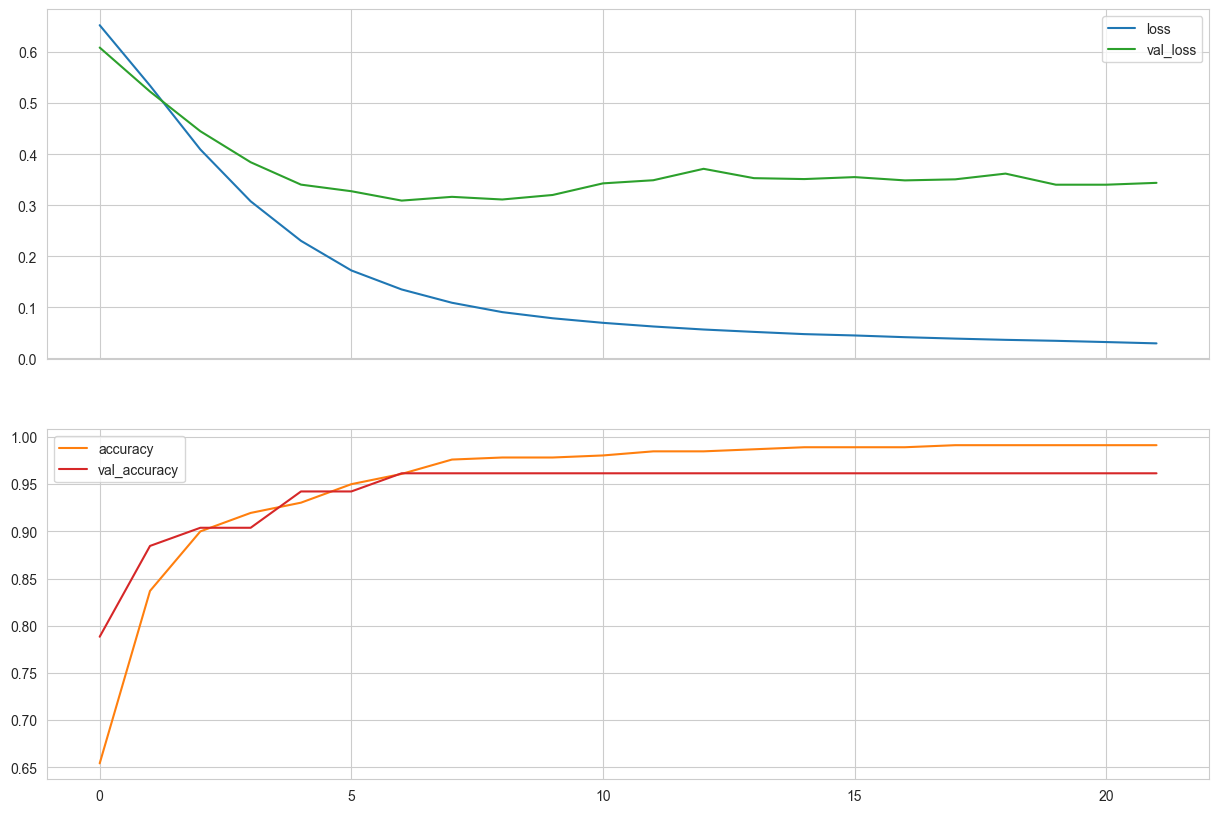

In [52]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [53]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1693921685218811
accuracy :  0.9298245906829834


In [54]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 7ms/step
[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [55]:
# model.save('model_cancer.h5')

# skorlarimiz nerde iyi geldiyse orda hemen modal save yapmak gerekir. cunku ayni kod bir sonraki 
# calistirmada cok daha kotu sonuc verebiliyor. ya da tekrar modeli kurup eger daha yuksek skor alirsak bunu tekrar 
# kaydedip guncelleyebiliriz


In [56]:
## ----> hata sayısı ve skorlar aynı olabilir ama şu anda elimde daha güvenilir bir model var overfittingten kurtardık.

### learning_rate

In [57]:
from tensorflow.keras.optimizers import Adam
## biz eğer bir optimizer'ın default learnig rate'ini değiştirmek istiyorsak tensorflow.keras.optimizers'dan
## hangi optimizerın learning rate'ini değiştireceksek önce onu import ediyoruz.

In [58]:
tf.keras.utils.set_random_seed(seed)


model = Sequential()

model.add(Dense(36, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(18, activation = "relu"))
model.add(Dense(9, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(learning_rate=  0.005)

# optimizer'ı compile'a string olarak verdiğimizde "adam" gibi ; bu default learning rate kullanacağım demektir bunu değiştirmek
# istiyorsak opt = Adam(learning_rate=  0.005) bu şekilde tanımlayıp içerisine istediğimiz lr oranını yazıp
# ardından compile satırına  bunu tanımlıyoruz :

# 0.005 ile baslayip local minimuma yaklastikca lr'yi otomatik degistirsin demek bu. bizim degistirdigimiz sadece
# baslangic degeri oluyor. defaultu 0.001

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [59]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 15, restore_best_weights = True)

In [60]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],
)

Epoch 1/600
15/15 [==============================] - 1s 15ms/step - loss: 0.4707 - accuracy: 0.8130 - val_loss: 0.3721 - val_accuracy: 0.9231
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1578 - accuracy: 0.9435 - val_loss: 0.3218 - val_accuracy: 0.9615
Epoch 3/600
15/15 [==============================] - 0s 8ms/step - loss: 0.0781 - accuracy: 0.9696 - val_loss: 0.4467 - val_accuracy: 0.9423
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.0546 - accuracy: 0.9739 - val_loss: 0.4869 - val_accuracy: 0.9615
Epoch 5/600
15/15 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9848 - val_loss: 0.4555 - val_accuracy: 0.9615
Epoch 6/600
15/15 [==============================] - 0s 7ms/step - loss: 0.0440 - accuracy: 0.9783 - val_loss: 0.3517 - val_accuracy: 0.9615
Epoch 7/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0320 - accuracy: 0.9891 - val_loss: 0.3365 - val_accuracy: 0.9615
Epoch 8/600


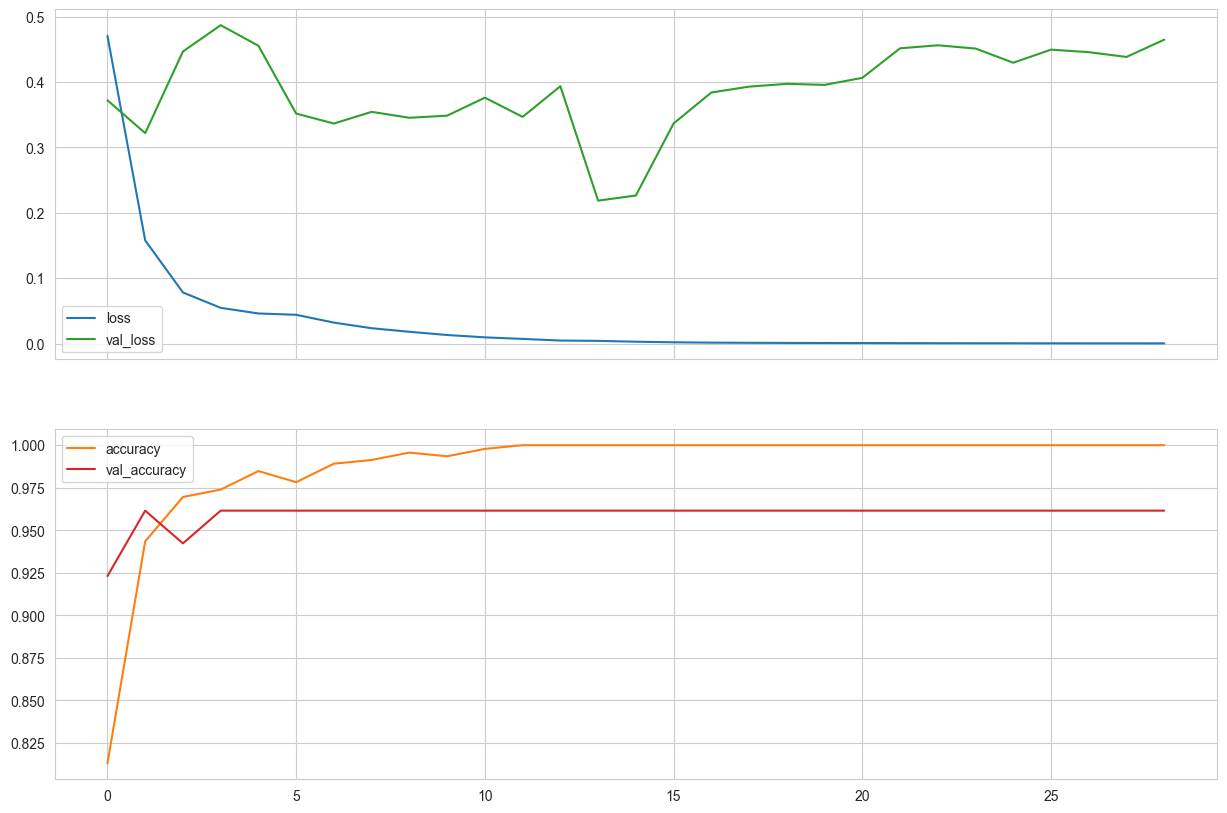

In [62]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [63]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3999232351779938
accuracy :  0.9122806787490845


In [64]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 6ms/step
[[19  2]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.94      0.92      0.93        36

    accuracy                           0.91        57
   macro avg       0.90      0.91      0.91        57
weighted avg       0.91      0.91      0.91        57



In [65]:
## daha kötü bir lokal minimuma girdi ve overfittinge meyilli.

### Dropout

The Dropout layer randomly sets input units to 0 with a frequency of `rate`
at each step during training time, which helps prevent overfitting.

In [66]:
from tensorflow.keras.layers import Dropout

# ---> Dropout'ta bir regularization tekniğidir.
# Dropout, ağın belirli bir kısmını her İTERASYONDA rastgele seçerek "eğitim" sırasında devre dışı bırakır.Yukarıda şekilde 
# görüleceği gibi. biz modelimizin datayı ezberlemesini engellemek isteriz datadaki kuralları öğrenmesini datanın yapısını 
# anlamasını isteriz ama model datayı takıntı haline getirirse yani ezberlerse bu dropout yöntemi de kullanabileceğimiz bir 
# regularization tekniğidir.


# Dropout'u bir layer gibi modelimize ekleyeceğiz aşağıdaki örnekte olduğu gibi. 
# model.add(Dropout(0.2)) demek her iterasyonda nöronların MAX  %20 'si kapanacak demektir ve bu her iterasyonda RASTGELE olur

In [67]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(18, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(9, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])


In [68]:
model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=600,
    verbose=1,
    callbacks=[early_stop],  # we'll use both early stop and dropout
)

Epoch 1/600
15/15 [==============================] - 2s 23ms/step - loss: 0.7858 - accuracy: 0.5783 - val_loss: 0.6527 - val_accuracy: 0.7500
Epoch 2/600
15/15 [==============================] - 0s 6ms/step - loss: 0.7293 - accuracy: 0.6109 - val_loss: 0.6333 - val_accuracy: 0.7885
Epoch 3/600
15/15 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.6543 - val_loss: 0.6178 - val_accuracy: 0.8077
Epoch 4/600
15/15 [==============================] - 0s 6ms/step - loss: 0.6698 - accuracy: 0.6652 - val_loss: 0.6001 - val_accuracy: 0.8846
Epoch 5/600
15/15 [==============================] - 0s 8ms/step - loss: 0.6045 - accuracy: 0.7043 - val_loss: 0.5735 - val_accuracy: 0.8846
Epoch 6/600
15/15 [==============================] - 0s 9ms/step - loss: 0.5957 - accuracy: 0.6739 - val_loss: 0.5454 - val_accuracy: 0.9231
Epoch 7/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5316 - accuracy: 0.7087 - val_loss: 0.5143 - val_accuracy: 0.9038
Epoch 8/600


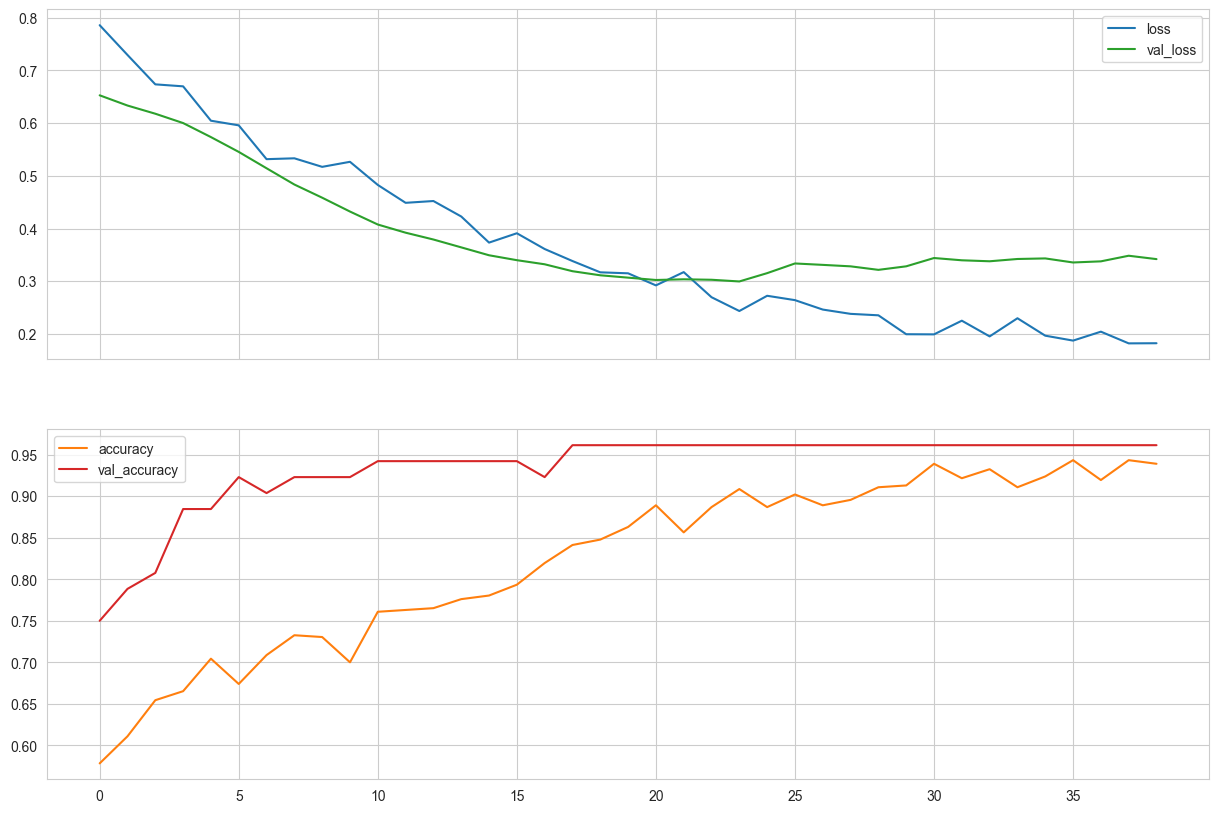

In [69]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"],["accuracy","val_accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [70]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.1424497365951538
accuracy :  0.9473684430122375


In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# skorlar su ana kadar ki en iyiler. burada bir model.save yapabiliriz aslinnda

2/2 [==============================] - 0s 2ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [72]:
# ----> dropout ile de overfittingi giderebildik.
# ! Hem dropout hem earlystop aynı anda kullanılabilir.

# L1 and L2 Regularizations(Weight Decay)

***Why should we use kernel_regularizer?***

- Kernel_regularizer is a technique that reduces the amount of weight of a network by allocating large weights to smaller ones. When kernel_regularizer is applied, the weights become smaller and the network is less likely to overfit.

Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.

Regularization penalties are applied on a per-layer basis. The exact API will depend on the layer, but many layers (e.g. Dense, Conv1D, Conv2D and Conv3D) have a unified API.

***These layers expose 3 keyword arguments:***

- kernel_regularizer: Regularizer to apply a penalty on the layer's kernel
- bias_regularizer: Regularizer to apply a penalty on the layer's bias
- activity_regularizer: Regularizer to apply a penalty on the layer's output

In [73]:
from tensorflow.keras.regularizers import l1, l2, L1L2

## deep learningte kernel'e yani weightlere , aktivasyon fonksiyonlarına ve bias'lere doğrudan penalty eklenebilir.

In [74]:
tf.keras.utils.set_random_seed(seed)

model = Sequential()

model.add(Dense(36, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3),
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5), 
                input_dim=X_train.shape[1]))

model.add(Dense(18, activation="relu", 
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))

model.add(Dense(9, activation="relu", # tum hidden layerlara uygulamak zorunda deigliz, nzılarini bos birakabiliriz
                kernel_regularizer=L1L2(l1=1e-3, l2=1e-3), 
                bias_regularizer=l2(1e-4), 
                activity_regularizer=l1(1e-5)))


model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [75]:
model.fit(x=X_train,
          y=y_train, 
          validation_data=(X_val, y_val), 
          batch_size=32, 
          epochs=600,
          callbacks=[early_stop],
          verbose=1
)

Epoch 1/600
15/15 [==============================] - 4s 31ms/step - loss: 0.9867 - accuracy: 0.6500 - val_loss: 0.9405 - val_accuracy: 0.7885
Epoch 2/600
15/15 [==============================] - 0s 22ms/step - loss: 0.8661 - accuracy: 0.8370 - val_loss: 0.8530 - val_accuracy: 0.8846
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.7404 - accuracy: 0.9022 - val_loss: 0.7720 - val_accuracy: 0.9038
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.9174 - val_loss: 0.7053 - val_accuracy: 0.9038
Epoch 5/600
15/15 [==============================] - 0s 7ms/step - loss: 0.5569 - accuracy: 0.9304 - val_loss: 0.6614 - val_accuracy: 0.9423
Epoch 6/600
15/15 [==============================] - 0s 9ms/step - loss: 0.4951 - accuracy: 0.9500 - val_loss: 0.6405 - val_accuracy: 0.9423
Epoch 7/600
15/15 [==============================] - 0s 7ms/step - loss: 0.4533 - accuracy: 0.9630 - val_loss: 0.6096 - val_accuracy: 0.9615
Epoch 8/600

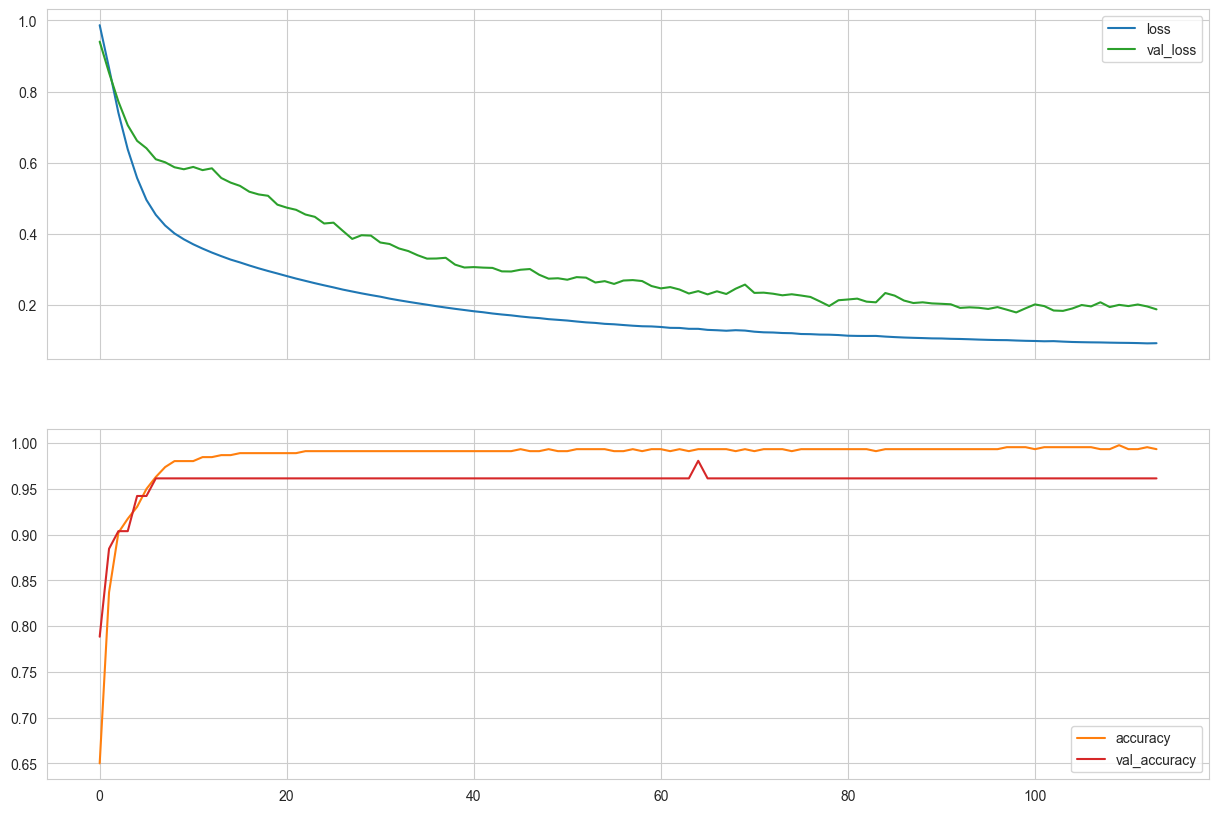

In [76]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(subplots=[["loss","val_loss"], ["accuracy","val_accuracy"]], layout=(2,1), figsize=(15,10))
plt.show()

In [77]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.20254112780094147
accuracy:  0.9649122953414917


In [78]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 7ms/step
[[20  1]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.97      0.97      0.97        36

    accuracy                           0.96        57
   macro avg       0.96      0.96      0.96        57
weighted avg       0.96      0.96      0.96        57



In [79]:
## skorlar daha da iyileşti overfittingte yok şimdiye kadar ki en iyi model bu.

2/2 [==============================] - 0s 4ms/step


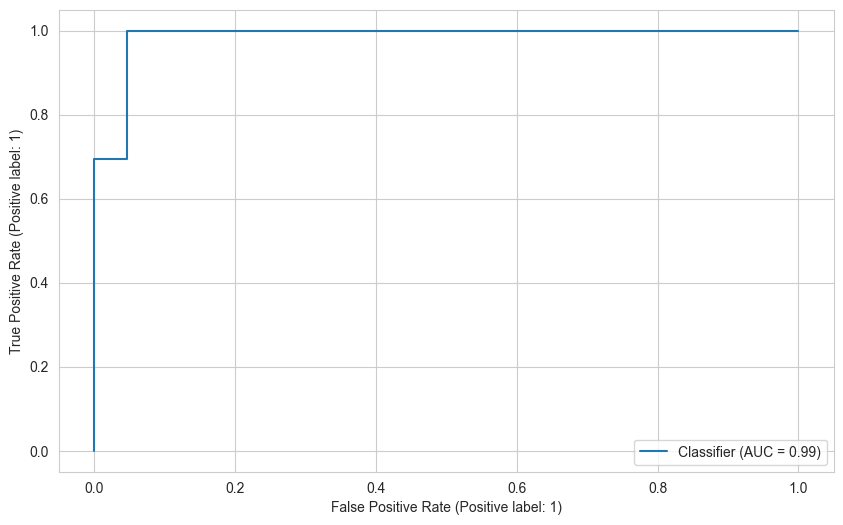

In [80]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [81]:
roc_auc_score(y_test, y_pred_proba)

0.9854497354497354

In [82]:
model.save("l1l2_model.h5")

## Cross Validation

**Keras models** can be used in **scikit-learn** by wrapping them with the **KerasClassifier** or **KerasRegressor** class.

To use these wrappers you must define a function that creates and returns your Keras sequential model, then pass this function to the build_fn argument when constructing the KerasClassifier class.

The constructor for the KerasClassifier class can take default arguments that are passed on to the calls to model.fit(), such as the number of epochs and the batch size.

In [83]:
# Dl'de cv genelde uygulanmaz. her foldda weights ve bias degisecegi icin saglikli sonuclar vermeyeblir.

from sklearn.model_selection import cross_validate
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


## cross_validate sklearnde olan bir uygulama biz doğrudan cross_validate'in içerisine ann ile kurduğumuz modeli verirsek hata
#alırız bunun için tensorflow.keras.wrappers.scikit_learn import KerasClassifier ile modelimizin üzerine adeta bir scikit_learn
# ambalajı geçirerek cross_validation yapabilme imkanı elde ediyoruz.

In [84]:
def build_classifier():
    tf.keras.utils.set_random_seed(seed)
    classifier = Sequential()
    classifier.add(Dense(units = 36, activation = 'relu'))
    classifier.add(Dense(units = 18, activation = 'relu'))
    classifier.add(Dense(units = 9, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [85]:
classifier_model = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 100, verbose=0)

# classifier_model'i sklearndeki bir classifaciton algoritması olarak kullanabiliriz artık !

scores = cross_validate(estimator = classifier_model, X = X_train, y = y_train,
                        scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)

# 

df_scores = pd.DataFrame(scores, index = range(1, 11)).iloc[:, 2:]

df_scores

2/2 [==============================] - 0s 3ms/step


,test_accuracy,test_precision,test_recall,test_f1
1,0.957,0.970,0.970,0.970
2,0.978,0.967,1.000,0.983
3,0.978,1.000,0.963,0.981
4,0.978,0.967,1.000,0.983
5,0.978,0.962,1.000,0.980
6,1.000,1.000,1.000,1.000
7,0.957,0.957,0.957,0.957
8,0.978,0.969,1.000,0.984
9,0.978,0.967,1.000,0.983
10,1.000,1.000,1.000,1.000


In [86]:
df_scores_summary = pd.DataFrame({"score_mean" : df_scores.mean().values, "score_std" : df_scores.std().values},
                                 index = ["acc", "pre", "rec", "f1"])

df_scores_summary

,score_mean,score_std
acc,0.978,0.014
pre,0.976,0.017
rec,0.989,0.018
f1,0.982,0.013


In [87]:
## ----> cv teorik olarak uygulanabilen ama pratikte uygulanmayan bir durumdur ; modelimizi her kurduğumuzda farklı ağırlıklarla
## başlar çünkü bu cv'ının mantığına aykırı bir durumdur burada 10 farklı model deniyoruz! 

# yine de kullanmak istersek scikitlearnden wrap ile aliriz

## Hyperparameter Optimization

https://optuna.org

In [88]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam

In [89]:
#!pip install optuna

In [90]:
import optuna

## GridSearch'i de aynı cv'da olduğu gibi kullanabilriz burada ama optunayı kullanacağız bunun nedenleri
## ---> sklearn GPU'yu kullanamaz , gridsearch verdiğimiz uzaydaki bütün kombinasyonları deniyor DL'de çok fazla hyperparametre
# var bunun için GPU'yu kullanabileceğimiz bir optimization yöntemi olan optuna'yı kullanıyoruz.

# optunayı Ml algoritmalarında da kullanabiliriz.

In [91]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15, restore_best_weights=True
)

In [92]:
trial_metric = "Accuracy"
batch_size = 64

# batch_size = 64 model biraz daha hızlı eğitilsin diye batch_size'ı 32'den 64'e çıkardık

def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 64, 128) # ilk layerda kaç tane nöron olsun 64'ten 128'e kadar dene diyoruz
    n_units2 = trial.suggest_int("n_units2", 16, 64)  # ama dikkat hepsini denemeyecek en iyiye doğru bir yönelimi olacak. 
    n_units3 = trial.suggest_int("n_units3", 16, 64)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam]) # optimizer olarak buradakileri dene
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1e-1) 
    regularizer1 = trial.suggest_loguniform("regularizer1", 1e-5, 1e-3)
    regularizer2 = trial.suggest_loguniform("regularizer2", 1e-5, 1e-3)
    dropout = trial.suggest_categorical("dropout",[0, .3, .5])
    
    # deneyeceğimiz hyperparametrelerin uzayını belirledik.
    # modeli aynı seed'de çalıştırarak

    tf.keras.utils.set_random_seed(seed)
    model = Sequential()
    model.add(Dense(n_units1,  
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2), 
                    input_dim=X_train.shape[1],))
    model.add(Dropout(dropout))
    model.add(Dense(n_units2, 
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2), 
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(n_units3,
                    activation="relu", 
                    kernel_regularizer=L1L2(l1=regularizer1, l2=regularizer2),
                    bias_regularizer=l2(regularizer2), 
                    activity_regularizer=l1(regularizer2)))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))
   



    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric]
    )
    
    
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5) # mimarinin içerisinde direk veremediğimiz bir hyperparametre-->(class_weight)
    w1 = trial.suggest_loguniform("w1", 0.01, 2) # daha var bunu fit içerisinde belirtebiliyoruz ondan dolayı burada tanımladık
                                                 # denenmesi için.
    model.fit(
        X_train,
        y_train,
        validation_data=(X_val, y_val),
        batch_size=batch_size,
        epochs=700,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    return model.evaluate(X_test, y_test, verbose=0)[1]

In [93]:
study = optuna.create_study(direction="maximize") # trial_metric = "Accuracy" olduğundan bunu maximize etmek istiyoruz.
study.optimize(objective, n_trials=15) # 15 trials denenecek istersek daha fazla da yazabiliriz.optimize edeceği :def objective
display(study.best_params)

[I 2023-05-15 19:50:25,350] A new study created in memory with name: no-name-d76ef119-f089-4aaa-8718-493640f29e9c


Restoring model weights from the end of the best epoch: 1.
Epoch 16: early stopping


[I 2023-05-15 19:50:28,419] Trial 0 finished with value: 0.24561403691768646 and parameters: {'n_units1': 110, 'n_units2': 40, 'n_units3': 49, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.00021727482151568544, 'regularizer1': 4.436821128585331e-05, 'regularizer2': 5.237405350857655e-05, 'dropout': 0.3, 'w0': 3.1442427366495713, 'w1': 0.016408073638775247}. Best is trial 0 with value: 0.24561403691768646.
[I 2023-05-15 19:50:59,021] Trial 1 finished with value: 0.8245614171028137 and parameters: {'n_units1': 127, 'n_units2': 41, 'n_units3': 54, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.000686783548377258, 'regularizer1': 0.0006079784536701224, 'regularizer2': 0.00014659514259160304, 'dropout': 0, 'w0': 0.22861940924107252, 'w1': 1.2919869384086007}. Best is trial 1 with value: 0.8245614171028137.


Restoring model weights from the end of the best epoch: 4.
Epoch 19: early stopping


[I 2023-05-15 19:51:02,162] Trial 2 finished with value: 0.9649122953414917 and parameters: {'n_units1': 97, 'n_units2': 59, 'n_units3': 46, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.003119207918102587, 'regularizer1': 1.0565663973824476e-05, 'regularizer2': 2.1134098508113238e-05, 'dropout': 0.3, 'w0': 0.9937379416978489, 'w1': 0.21975542481306676}. Best is trial 2 with value: 0.9649122953414917.
[I 2023-05-15 19:51:30,202] Trial 3 finished with value: 0.6666666865348816 and parameters: {'n_units1': 83, 'n_units2': 40, 'n_units3': 20, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 4.278615871370008e-05, 'regularizer1': 0.00019120382678487386, 'regularizer2': 0.00014171460061261092, 'dropout': 0.3, 'w0': 0.01562093012989056, 'w1': 0.6720438592111316}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 21.
Epoch 36: early stopping


[I 2023-05-15 19:51:32,910] Trial 4 finished with value: 0.9122806787490845 and parameters: {'n_units1': 65, 'n_units2': 23, 'n_units3': 36, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.0025932328347190075, 'regularizer1': 0.00012535146232421217, 'regularizer2': 3.4229660947644685e-05, 'dropout': 0.5, 'w0': 1.095982940965102, 'w1': 0.15168553766456533}. Best is trial 2 with value: 0.9649122953414917.
[I 2023-05-15 19:51:59,304] Trial 5 finished with value: 0.6140350699424744 and parameters: {'n_units1': 82, 'n_units2': 16, 'n_units3': 43, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 3.528896788265221e-05, 'regularizer1': 1.7262276773528458e-05, 'regularizer2': 7.523087585935534e-05, 'dropout': 0.3, 'w0': 0.8302655467692381, 'w1': 0.036975964644847564}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 70.
Epoch 85: early stopping


[I 2023-05-15 19:52:03,906] Trial 6 finished with value: 0.6315789222717285 and parameters: {'n_units1': 126, 'n_units2': 57, 'n_units3': 59, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.013781661293091035, 'regularizer1': 0.0001595561403539472, 'regularizer2': 0.00045327339162497726, 'dropout': 0.3, 'w0': 0.015481672184556301, 'w1': 0.8597429383487909}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 295.
Epoch 310: early stopping


[I 2023-05-15 19:52:15,664] Trial 7 finished with value: 0.9473684430122375 and parameters: {'n_units1': 117, 'n_units2': 38, 'n_units3': 41, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00042935120477609676, 'regularizer1': 0.0003563236284118378, 'regularizer2': 0.0007448624583940521, 'dropout': 0, 'w0': 1.128657017711826, 'w1': 0.2628817107441027}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 604.
Epoch 619: early stopping


[I 2023-05-15 19:52:37,809] Trial 8 finished with value: 0.9649122953414917 and parameters: {'n_units1': 80, 'n_units2': 51, 'n_units3': 61, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 7.508585496986344e-05, 'regularizer1': 0.0001851775623283837, 'regularizer2': 0.00012084028612939909, 'dropout': 0, 'w0': 0.07312032681362979, 'w1': 0.5823835053712121}. Best is trial 2 with value: 0.9649122953414917.
[I 2023-05-15 19:53:04,199] Trial 9 finished with value: 0.9122806787490845 and parameters: {'n_units1': 121, 'n_units2': 59, 'n_units3': 26, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.005682823234737578, 'regularizer1': 1.7919556800959562e-05, 'regularizer2': 2.699798387224434e-05, 'dropout': 0, 'w0': 0.1070383132530233, 'w1': 0.5234776436784444}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 10.
Epoch 25: early stopping


[I 2023-05-15 19:53:07,061] Trial 10 finished with value: 0.8771929740905762 and parameters: {'n_units1': 102, 'n_units2': 50, 'n_units3': 30, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.023361778185387747, 'regularizer1': 1.0562879990569212e-05, 'regularizer2': 1.0150623685833533e-05, 'dropout': 0.5, 'w0': 3.4940483946268945, 'w1': 0.06857679648399578}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 8.
Epoch 23: early stopping


[I 2023-05-15 19:53:09,211] Trial 11 finished with value: 0.9649122953414917 and parameters: {'n_units1': 86, 'n_units2': 51, 'n_units3': 61, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.045500531381790325, 'regularizer1': 5.5284498041070944e-05, 'regularizer2': 1.0024507795230687e-05, 'dropout': 0, 'w0': 0.08654799650481988, 'w1': 0.2575504877672572}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 125.
Epoch 140: early stopping


[I 2023-05-15 19:53:16,563] Trial 12 finished with value: 0.9649122953414917 and parameters: {'n_units1': 68, 'n_units2': 63, 'n_units3': 64, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.00014058702594503102, 'regularizer1': 7.76476006926249e-05, 'regularizer2': 0.00026270676894218475, 'dropout': 0, 'w0': 0.2925386073286929, 'w1': 1.45876853654489}. Best is trial 2 with value: 0.9649122953414917.
[I 2023-05-15 19:53:44,997] Trial 13 finished with value: 0.8947368264198303 and parameters: {'n_units1': 95, 'n_units2': 51, 'n_units3': 50, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 1.2720022202484722e-05, 'regularizer1': 4.08382838536284e-05, 'regularizer2': 9.822236326238782e-05, 'dropout': 0.3, 'w0': 0.04848237519667275, 'w1': 0.360255666910182}. Best is trial 2 with value: 0.9649122953414917.


Restoring model weights from the end of the best epoch: 54.
Epoch 69: early stopping


[I 2023-05-15 19:53:49,598] Trial 14 finished with value: 0.9298245906829834 and parameters: {'n_units1': 95, 'n_units2': 48, 'n_units3': 54, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.0018133123227106979, 'regularizer1': 0.0009182873592514478, 'regularizer2': 2.512701560744329e-05, 'dropout': 0.5, 'w0': 0.4185314418760103, 'w1': 0.13861863754852846}. Best is trial 2 with value: 0.9649122953414917.


{'n_units1': 97,
 'n_units2': 59,
 'n_units3': 46,
 'optimizer': keras.optimizers.optimizer_experimental.nadam.Nadam,
 'learning_rate': 0.003119207918102587,
 'regularizer1': 1.0565663973824476e-05,
 'regularizer2': 2.1134098508113238e-05,
 'dropout': 0.3,
 'w0': 0.9937379416978489,
 'w1': 0.21975542481306676}

In [94]:
## her çalıştırdığımızda farklı şeyler deneyecek ; seed olsa da(başlangıçta aynı yerden başlasa da )
# kendisi farklı şeyler deneyerek  devam ediyor.

In [95]:
# build model with optuna parameters
unit1, unit2, unit3, optimizer, lr, lreg1, lreg2, dropout_rate, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["n_units3"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["regularizer1"],
    study.best_params["regularizer2"],
    study.best_params["dropout"],
    study.best_params["w0"],
    study.best_params["w1"],
)

tf.keras.utils.set_random_seed(seed)
model = Sequential()
model.add(Dense(unit1, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit2, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(unit3, 
                activation="relu", 
                kernel_regularizer=L1L2(l1=lreg1, l2=lreg2), 
                bias_regularizer=l2(lreg2), 
                activity_regularizer=l2(lreg2)))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Accuracy"])

# train model
model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=500,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/500
8/8 [==============================] - 2s 36ms/step - loss: 0.5873 - Accuracy: 0.7283 - val_loss: 0.4667 - val_Accuracy: 0.8654
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 0.3530 - Accuracy: 0.8978 - val_loss: 0.2777 - val_Accuracy: 0.8846
Epoch 3/500
8/8 [==============================] - 0s 11ms/step - loss: 0.1984 - Accuracy: 0.9435 - val_loss: 0.2050 - val_Accuracy: 0.9423
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.1569 - Accuracy: 0.9435 - val_loss: 0.2296 - val_Accuracy: 0.9615
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 0.1304 - Accuracy: 0.9543 - val_loss: 0.2461 - val_Accuracy: 0.9615
Epoch 6/500
8/8 [==============================] - 0s 10ms/step - loss: 0.0975 - Accuracy: 0.9696 - val_loss: 0.2611 - val_Accuracy: 0.9615
Epoch 7/500
8/8 [==============================] - 0s 11ms/step - loss: 0.0976 - Accuracy: 0.9696 - val_loss: 0.2677 - val_Accuracy: 0.9615
Epoch 8/500
8/8 [======

In [96]:
history = model.history.history

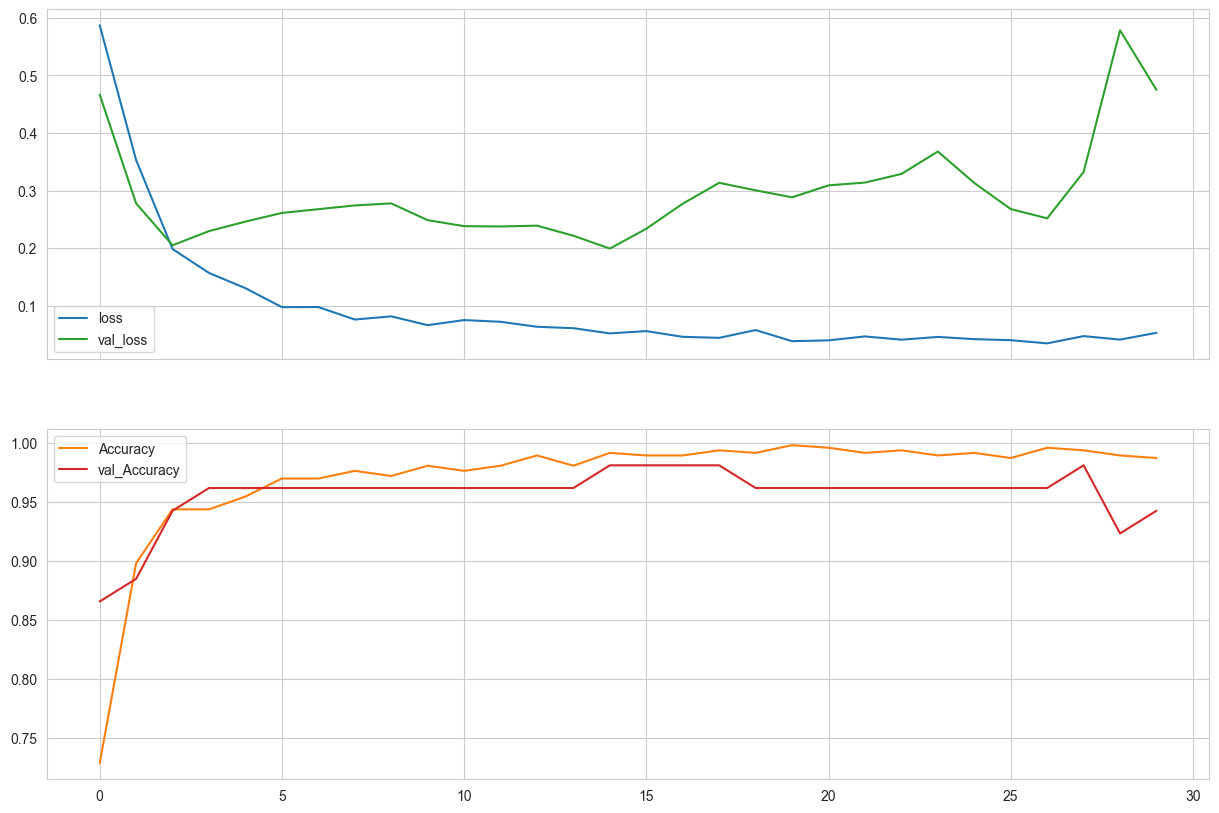

In [97]:
loss_df = pd.DataFrame(history)
loss_df.plot(subplots=[["loss","val_loss"],["Accuracy","val_Accuracy"]], layout=(2,1),figsize=(15,10))
plt.show()

In [98]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 3ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [99]:
# bizim kurduğum l1l2 model optunanın bize verdğinden daha iyi onunla devam edebiliriz .UNUTMAYALIM :
# optuna bize bir başlangıç noktası verir buradan gelecek hyperparametreler mutlak doğrudur gibi bir yaklaşım olmamalıdır.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

2/2 [==============================] - 0s 4ms/step


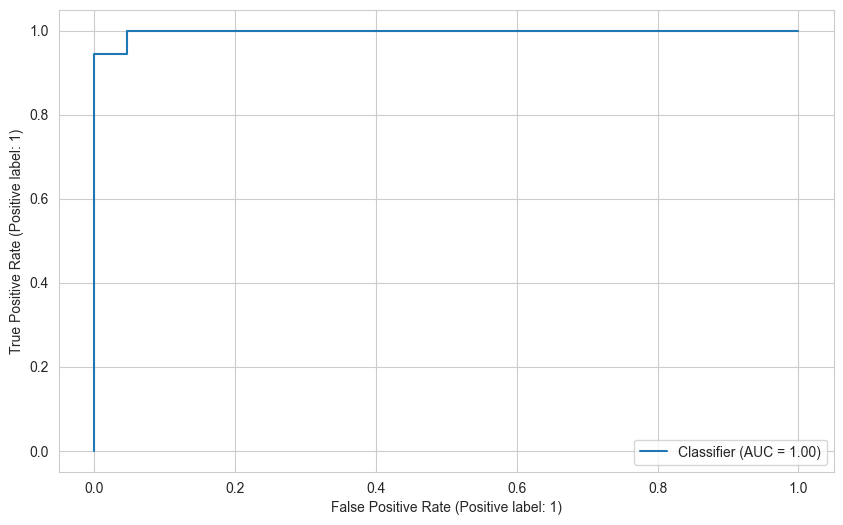

In [100]:
y_pred_proba = model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [101]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.16725021600723267
accuracy:  0.9473684430122375


In [102]:
roc_auc_score(y_test, y_pred_proba)

0.9973544973544973

## Saving Final Model and Scaler

In [103]:
import pickle

pickle.dump(scaler, open("scaler_cancer", 'wb'))

In [104]:
# optunadan aldigimizi kaydediyoruz, ama l1l2 daha iyidi; onu da alabiliriz
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

2/2 [==============================] - 0s 4ms/step
[[20  1]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



In [105]:
model.save('model_cancer.h5')

## Loading Model and Scaler

In [106]:
from tensorflow.keras.models import load_model

In [107]:
model_cancer = load_model('model_cancer.h5')
#model_cancer = load_model("l1l2_model.h5")
scaler_cancer = pickle.load(open("scaler_cancer", "rb"))

## Prediction

In [108]:
single_patient = df1.drop('Cancer', axis = 1).iloc[0:1, :]
single_patient

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.380,0.118,0.278,0.300,0.147,0.242,0.079,1.095,0.905,0.006,0.049,0.054,0.016,0.030,0.006,25.380,17.330,0.162,0.666,0.712,0.265,0.460,0.119


In [109]:
single_patient = scaler_cancer.transform(single_patient)
single_patient

array([[ 1.15125536, -1.49157054,  1.20789474,  2.71756451,  2.24078453,
         2.07067873,  1.83199416,  2.17652702,  3.12076716, -0.27578922,
         0.01210112,  1.51382488,  1.1497669 ,  0.72219885,  1.43414021,
         1.35819431,  1.89535942, -0.93505747,  1.01143791,  2.27537136,
         1.81790011,  1.61621608,  2.58036364,  1.92033751]])

In [110]:
(model_cancer.predict(single_patient) > 0.5).astype("int32")

1/1 [==============================] - 0s 113ms/step


array([[0]], dtype=int32)

In [111]:
df["Cancer"].iloc[0]

0

## Comparison with ML

In [1]:
X_train, X_test, y_train, y_test = train_test_split( X, y, stratify=y, test_size=0.1, random_state=seed)

NameError: name 'train_test_split' is not defined

### Logistic Regression

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
log_model=LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.94      0.94      0.94        36

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



### Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  2]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.95      0.97      0.96        36

    accuracy                           0.95        57
   macro avg       0.95      0.94      0.94        57
weighted avg       0.95      0.95      0.95        57



## CATBoost

In [ ]:
from catboost import CatBoostClassifier
# Train the CatBoostClassifier model with early stopping
cat_model = CatBoostClassifier(iterations=1000, early_stopping_rounds=10, random_state=42, depth=3, learning_rate = 0.1, eval_metric='Accuracy', use_best_model=True)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Use the trained model to make predictions on the test set
y_pred = cat_model.predict(X_test)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Use the trained model to make predictions on the test set
y_pred_train = cat_model.predict(X_train)

# Print the confusion matrix and classification report
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))